Mô hình hồi quy tuyến tính đa biến đơn 
<br>
feature : x1,x2
<br>
target : y
<br>
y = f(x1,x2)
<br>
y^ = b0 + B1x1 + B2x2 + ... + Bkxk + €
<br>
yi = y^i + €i
<br>
∑€^2 -> min
<br>
<img src="z5933075526914_f034f140309983577738d1da97c4e244.jpg" style="margin : 30px ;width:800px"></img>

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_excel('data_mlr.xlsx',sheet_name="data")
df

,gold,fuel,food
0,60,22,140
1,62,25,155
2,67,24,159
3,70,20,179
4,71,15,192
5,72,14,200
6,75,14,212
7,78,11,215


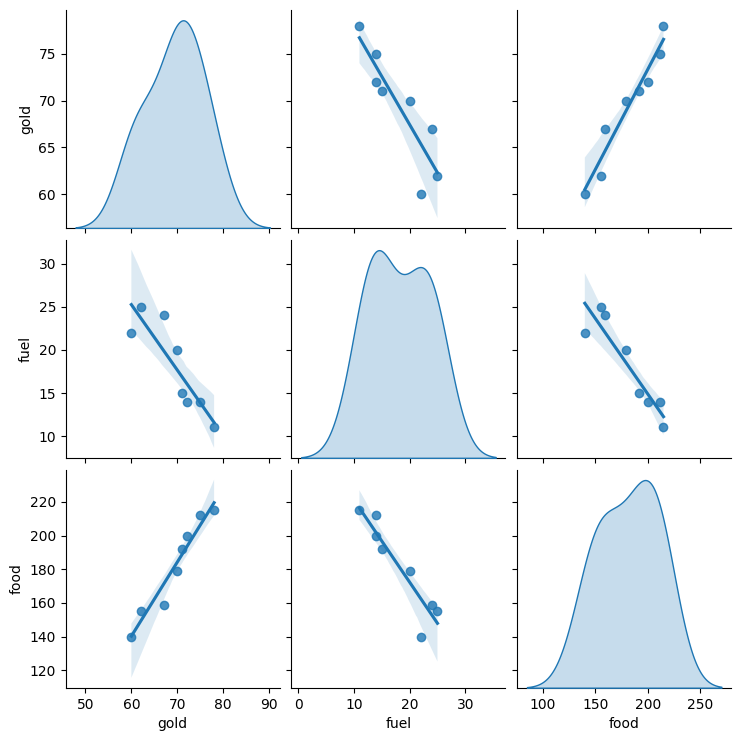

In [48]:

sns.pairplot(df[['gold','fuel','food']], 
             diag_kind='kde', kind='reg')
plt.show()


In [49]:

# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['gold','fuel']].values # explanatory = feature
y = df[['food']].values # reponse = target

In [50]:

# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)


In [51]:

# Cross Validation
# Chia tách ra training (huấn luyện) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, 
                                                    random_state=16)


In [52]:

# Xây dựng mô hình hồi quy tuyến tính đơn biến: 
from sklearn import linear_model 


In [53]:

# Khai báo mô hình MLR
model = linear_model.LinearRegression()


In [54]:

# Huấn luyện mô hình 
model.fit(X_train,y_train)




LinearRegression()

In [55]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [30.74820144]
Coefficients: [[ 2.63309353 -1.51079137]]


In [56]:

import numpy as np
from sklearn import metrics

# Tính giá trị dự báo Food dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))




Score or R-Squared: 0.727527455911011
Mean Absolute Error: 9.071942446043153
Root Mean Squared Error: 10.311760777419536
Mean Absolute Percentage Error: 0.05851499177188531


In [59]:



y_test_pred = model.predict(X_test)
y_test_pred

array([[170.90647482],
       [195.03597122],
       [155.49640288],
       [184.84892086]])

In [60]:
X_test

array([[67., 24.],
       [71., 15.],
       [60., 22.],
       [70., 20.]])

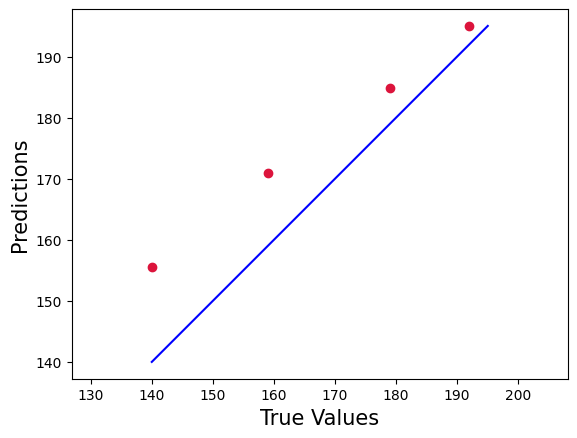

In [61]:

plt.scatter(y_test, y_test_pred, c='crimson')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


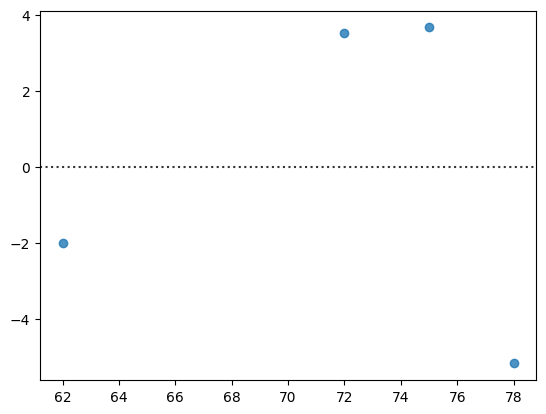

In [63]:
# (Train data set) Vẽ residual bằng Python
sns.residplot(x=X_train[:,0], y=y_train)
plt.show()


In [69]:


# Lưu trữ mô hình đã huấn luyện xuống ổ đĩa
'''
Lưu trữ mô hình hồi quy xuống thiết bị lưu trữ với tên
model_linear_regression.sav
'''
import pickle
pickle.dump(model, open('model_linear_regression.sav', 'wb'))


import pickle
#Load model từ storage
loaded_model = pickle.load(open('model_linear_regression.sav', 'rb'))

vGold = float(input('Nhập Gold: '))
vFuel = float(input('Nhập Fuel: '))

predicted_ProfitRate = loaded_model.predict([[vGold,vFuel]])

print(f'Dự báo Food là: {predicted_ProfitRate}')


Dự báo Food là: [[219.51079137]]
